# **Canny Edge Detection using Otsu Thresholding**

B076 Khushi Tejwani



Research paper - 

https://pdfs.semanticscholar.org/82e3/e30d1fd56ee1ce3a25a564f5b46afa52115a.pdf

# Blurring using gaussian kernel

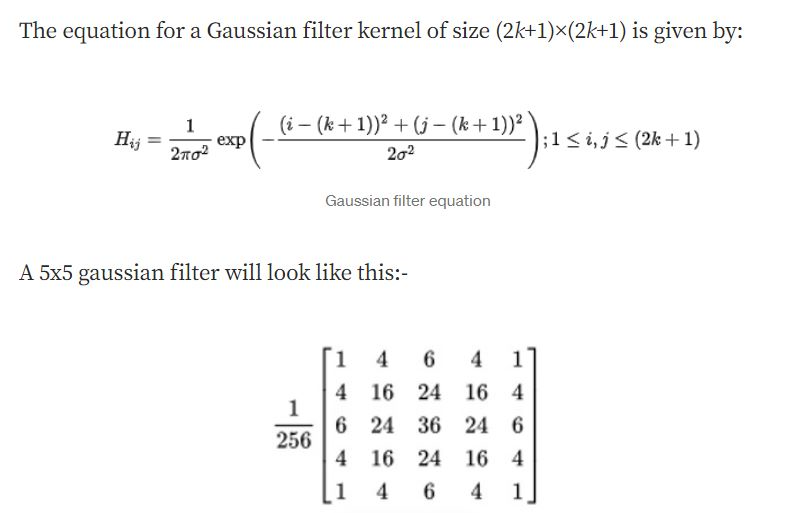

In [ ]:
#Noise Reduction

import numpy as np

def gaussian_kernel(size, sigma=1):
    # sigma = sigma1-1
    size = int(size) //2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g = np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    # print(g.shape)
    return g

# Gradient Calculation using Sobel

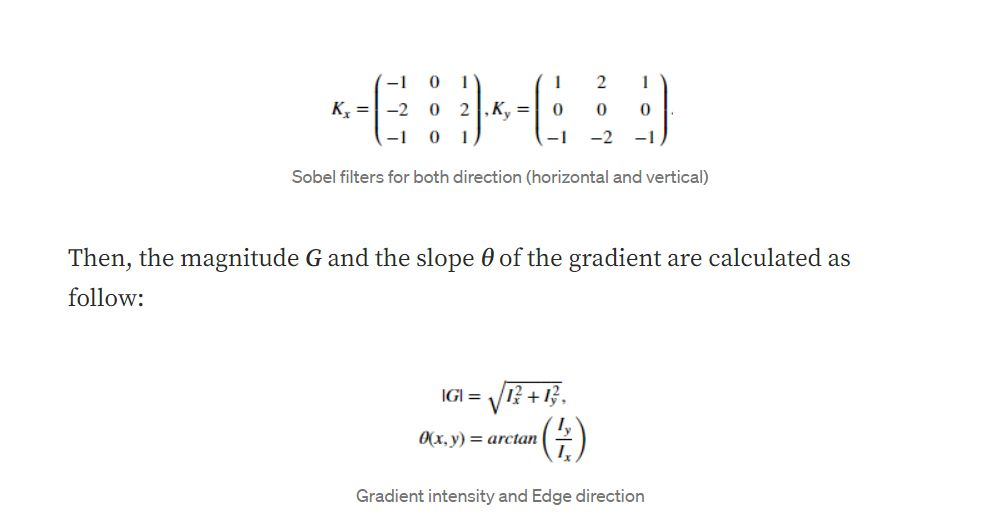

In [ ]:
#Gradient calculation

from scipy import ndimage

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)                                                  # sqrt(Ix**2 + Iy**2)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

# Non Max Suppression

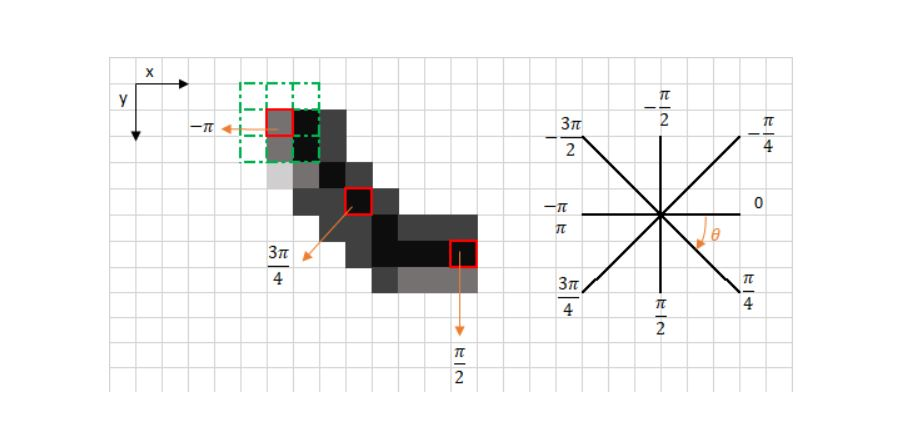

In [ ]:
# Non Max suppression

def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [ ]:

from skimage.exposure import histogram

def _validate_image_histogram(image, hist, nbins=None, normalize=False):
    """Ensure that either image or hist were given, return valid histogram.
    If hist is given, image is ignored.
    """
    if image is None and hist is None:
        raise Exception("Either image or hist must be provided.")

    if hist is not None:
        if isinstance(hist, (tuple, list)):
            counts, bin_centers = hist
        else:
            counts = hist
            bin_centers = np.arange(counts.size)

        if counts[0] == 0 or counts[-1] == 0:
            # Trim histogram from both ends by removing starting and
            # ending zeroes as in histogram(..., source_range="image")
            cond = counts > 0
            start = np.argmax(cond)
            end = cond.size - np.argmax(cond[::-1])
            counts, bin_centers = counts[start:end], bin_centers[start:end]
    else:
        counts, bin_centers = histogram(
            image.reshape(-1), nbins, source_range='image', normalize=normalize
            )
    return counts.astype('float32', copy=False), bin_centers


#OTSU

Minimize the within class variance: -


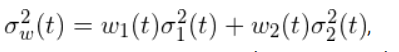

Maximise the between class variance: -

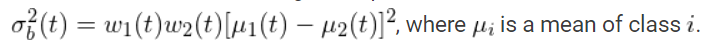

In [ ]:

# Threshold - Otsu method

def threshold_otsu(image=None, nbins=256, *, hist=None):
    """Return threshold value based on Otsu's method.
    Either image or hist must be provided. If hist is provided, the actual
    histogram of the image is ignored.
    -----
    The input image must be grayscale.
    """
    if image is not None and image.ndim > 2 and image.shape[-1] in (3, 4):
        # warn(f'threshold_otsu is expected to work correctly only for '
        #      f'grayscale images; image shape {image.shape} looks like '
        #      f'that of an RGB image.')
        pass

    # Check if the image has more than one intensity value; if not, return that
    # value
    if image is not None:
        first_pixel = image.reshape(-1)[0]
        if np.all(image == first_pixel):
            return first_pixel

    counts, bin_centers = _validate_image_histogram(image, hist, nbins)

    # class probabilities for all possible thresholds
    weight1 = np.cumsum(counts)
    weight2 = np.cumsum(counts[::-1])[::-1]
    # class means for all possible thresholds
    mean1 = np.cumsum(counts * bin_centers) / weight1
    mean2 = (np.cumsum((counts * bin_centers)[::-1]) / weight2[::-1])[::-1]

    # Clip ends to align class 1 and class 2 variables:
    # The last value of ``weight1``/``mean1`` should pair with zero values in
    # ``weight2``/``mean2``, which do not exist.
    variance12 = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

    idx = np.argmax(variance12)
    threshold = bin_centers[idx]

    return threshold


In [ ]:
# # normal methood 


# def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
#     highThreshold = img.max() * highThresholdRatio
#     lowThreshold = highThreshold * lowThresholdRatio
    
#     M, N = img.shape
#     res = np.zeros((M,N), dtype=np.int32)
    
#     weak = np.int32(25)
#     strong = np.int32(255)
    
#     strong_i, strong_j = np.where(img >= highThreshold)
#     zeros_i, zeros_j = np.where(img < lowThreshold)
    
#     weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
#     res[strong_i, strong_j] = strong
#     res[weak_i, weak_j] = weak
    
#     return (res, weak, strong)

In [ ]:
def dt(row, col, img, weak=25, strong=255):
  print(weak)
  print(strong)
  img2=np.zeros(img.shape)
  for r in range(row):
    for c in range(col):
      if img[r][c] >= strong:
        img2[r][c] = 255
      elif img[r][c] <= weak:
        img2[r][c] = 0
      else:
        img2[r][c]=img[r][c]
  return img2

# Hysteresis

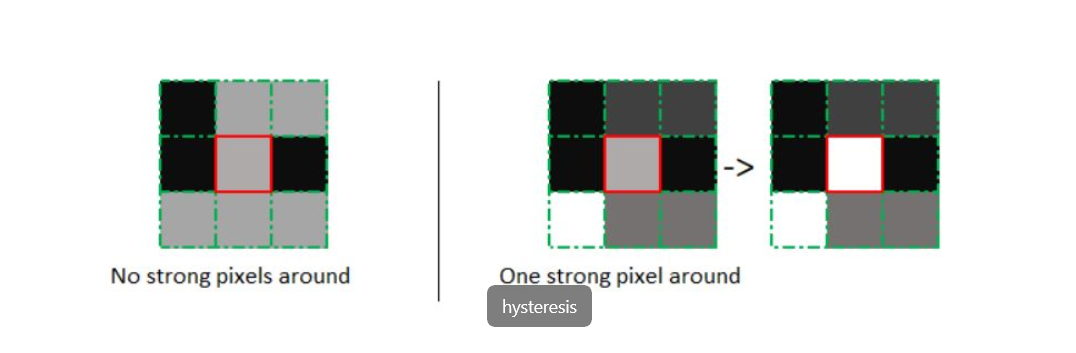

In [ ]:
# Edge tracking hysteresis
def hysteresis(img, weak):
    strong = 255
    M, N = img.shape

    img2=img.copy() 
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] > weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img2[i, j] = strong
                    else:
                        img2[i, j] = 0
                except IndexError as e:
                    pass
    return img2

# Main

In [ ]:
# from skimage import io
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/lenna_grey (1).jpg")

# print(img.shape)

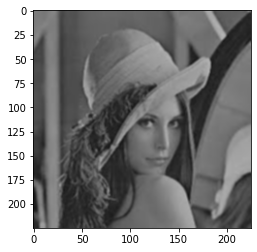

In [ ]:
size = 3

# -1 shows resulting image will have same depth as that of original image
gaussian_filter_img = cv2.filter2D(img,-1,gaussian_kernel(size, sigma=1))

#using cv
#gaussian_filter_img = cv2.GaussianBlur(img,(size,size),0)


# print(gaussian_filter_img.shape)
plt.imshow(gaussian_filter_img, cmap='gray')
# plt.show()

In [ ]:
from skimage.color import rgb2gray

In [ ]:
gray_image = rgb2gray(gaussian_filter_img)

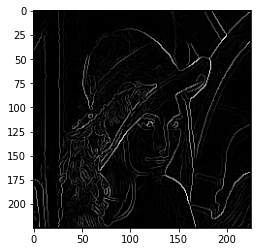

In [ ]:
grad, theta = sobel_filters(gray_image)
img_nms = non_max_suppression(grad, theta)

plt.imshow(img_nms, cmap='gray')

In [ ]:
weak = 50
strong = 159
img_thresh = dt(img_nms.shape[0], img_nms.shape[1], img_nms, weak, strong)

50
159


Text(0.5, 1.0, 'Threshold')

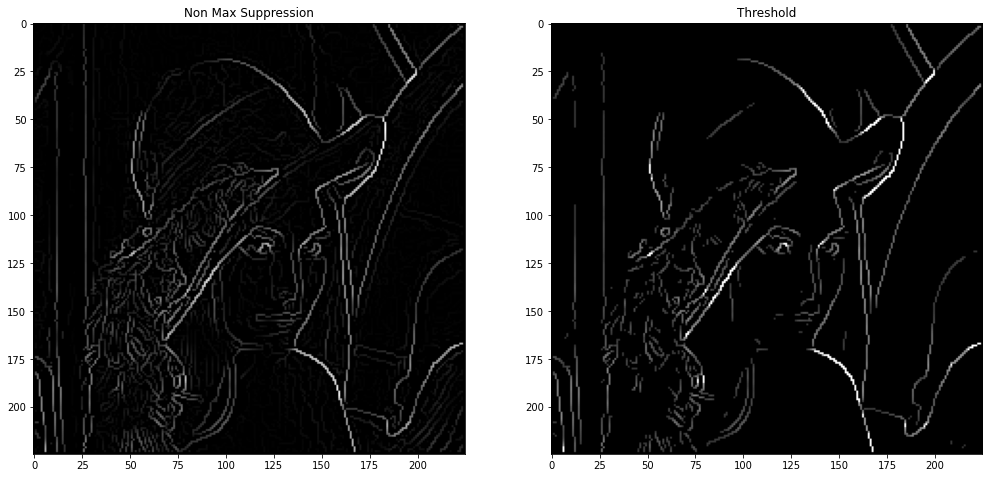

In [ ]:
plt.figure(figsize=(17, 17))
plt.subplot(1,2,1)
plt.imshow(img_nms, cmap='gray')
plt.title("Non Max Suppression")
plt.subplot(1,2,2)
plt.imshow(img_thresh, cmap='gray')
plt.title("Threshold")

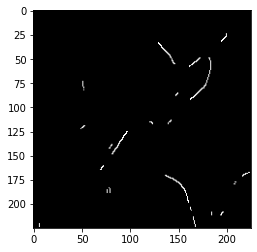

In [ ]:
img_final = hysteresis(img_thresh, weak)
plt.figure()
plt.imshow(img_final, cmap='gray')

Text(0.5, 1.0, 'Hysteresis')

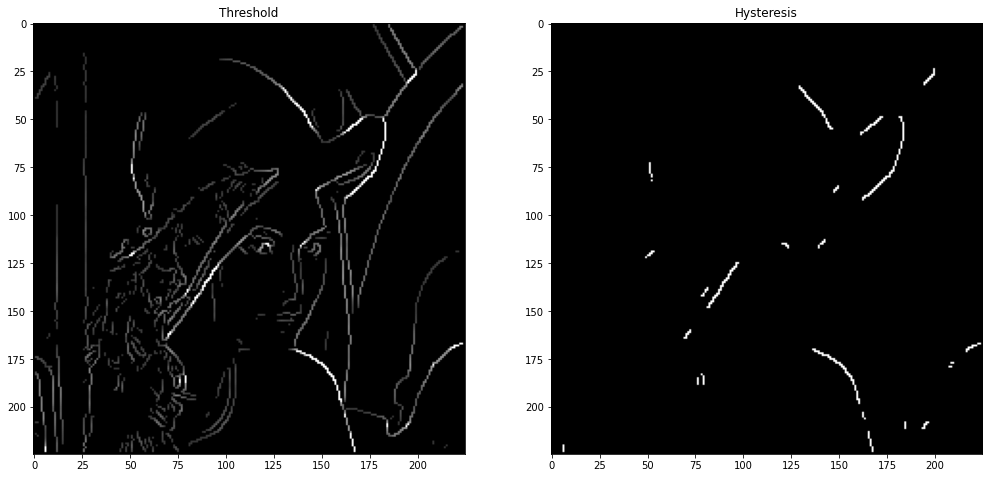

In [ ]:
plt.figure(figsize=(17, 17))
plt.subplot(1,2,1)
plt.imshow(img_thresh, cmap='gray')
plt.title("Threshold")
plt.subplot(1,2,2)
plt.imshow(img_final, cmap='gray')
plt.title("Hysteresis")

In [ ]:
# th = threshold_otsu(img_nms)

# otsu_img = img_nms.copy()
# row, col = otsu_img.shape

In [ ]:
# for r in range(row):
#   for c in range(col):
#     if otsu_img[r,c]<=th:
#       otsu_img[r,c]=0
#     else:
#       otsu_img[r,c]=255

In [ ]:
# plt.figure(figsize=(10, 18))
# plt.imshow(otsu_img, cmap='gray')

In [ ]:
# plt.figure(figsize=(20, 36))
# plt.subplot(1,2,1)
# plt.imshow(otsu_img, cmap='gray')
# plt.title("Otsu")
# plt.subplot(1,2,2)
# plt.imshow(img_final, cmap='gray')
# plt.title("Threshold")


multi otsu 

In [ ]:
from skimage.filters import threshold_multiotsu

In [ ]:
weak_otsu, strong_otsu = threshold_multiotsu(img_nms, classes=3)
# img_thresh_otsu = threshold_multiotsu_inp(img_nms, weak_otsu, strong_otsu)

In [ ]:
print(weak_otsu)
print(strong_otsu)

29
92


In [ ]:
img_nms.shape

(225, 225)

In [ ]:
row, col= img_nms.shape

img_thresh_otsu = img_nms.copy()
# for r in range(row):
#   for c in range(col):
#     if img_thresh_otsu[r][c] >= strong_otsu:
#       img_thresh_otsu[r][c] = 255
#     elif img_thresh_otsu[r][c] <= weak_otsu:
#       img_thresh_otsu[r][c] = 0

img_thresh_otsu = dt(row, col, img_thresh_otsu, weak_otsu, strong_otsu)

29
92


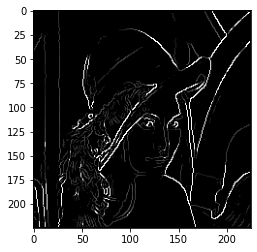

In [ ]:
plt.imshow(img_thresh_otsu, cmap='gray')

In [ ]:
img_final_otsu = hysteresis(img_thresh_otsu, weak_otsu)

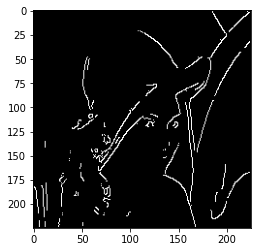

In [ ]:
plt.figure()
plt.imshow(img_final_otsu, cmap='gray')

Text(0.5, 1.0, 'After Hysteresis')

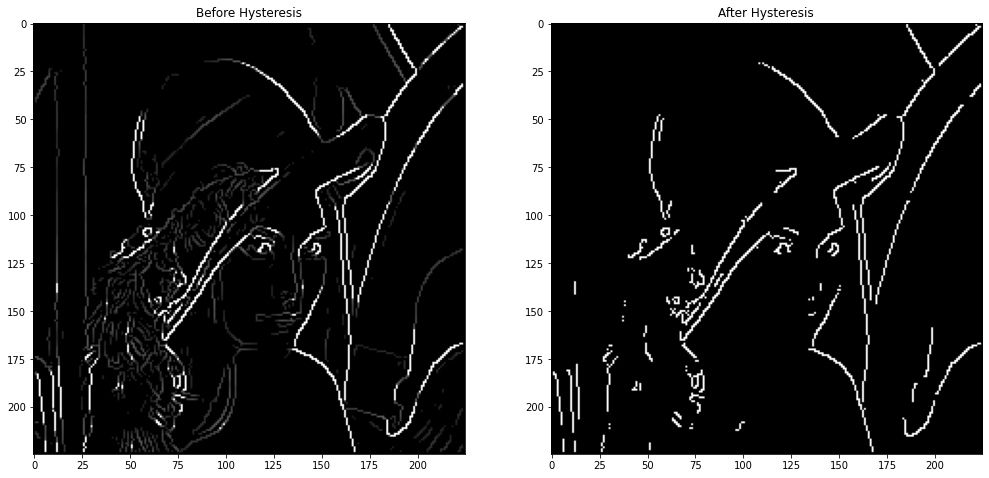

In [ ]:
plt.figure(figsize=(17, 17))
plt.subplot(1,2,1)
plt.imshow(img_thresh_otsu, cmap='gray')
plt.title("Before Hysteresis")
plt.subplot(1,2,2)
plt.imshow(img_final_otsu, cmap='gray')
plt.title("After Hysteresis")

Text(0.5, 1.0, 'Arbitrary Threshold')

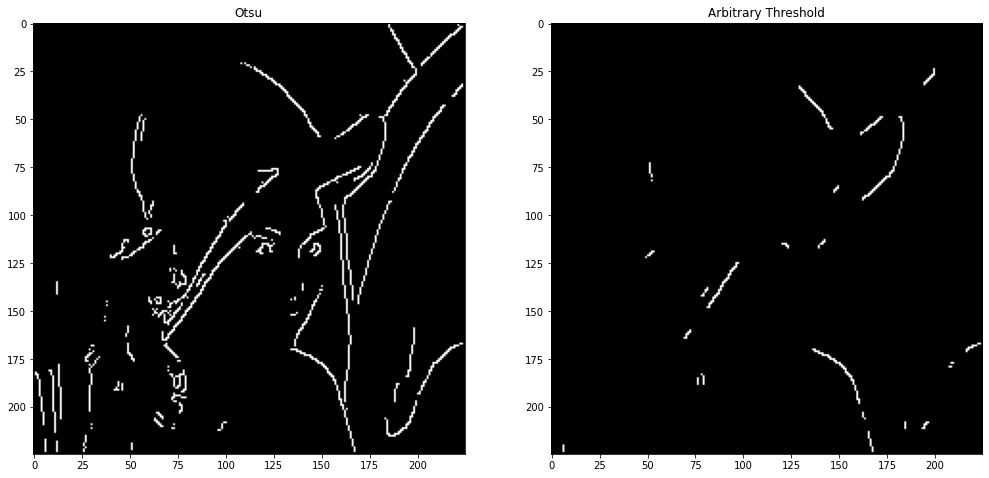

In [ ]:
plt.figure(figsize=(17, 17))
plt.subplot(1,2,1)
plt.imshow(img_final_otsu, cmap='gray')
plt.title("Otsu")
plt.subplot(1,2,2)
plt.imshow(img_final, cmap='gray')
plt.title("Arbitrary Threshold")